In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import re
# import plotly.express as px

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
gamintojas
tipas
ekrano įstrižainė
ekrano raiška
smart tv
operacinė sistema
spalva
modelis
tvx08 procesorius
ekrano tipas
vaizdo įrašymo parinktis
garso sistema
svoris su stovu
tvx09 wi-fi
belaidės pelės ir klaviatūros prijungimas
išmanusis nuotolinio valdymo pultas
tvx03 atnaujinimo dažnis
"ambilight"
smart tv technologija
tvx07 operacinė sistema
matmenys su stovu
didelis dinaminis diapazonas (hdr)
matmenys be stovo (pxaxd)
tvx12 usb
tvx10 bluetooth
tvx14 pilno dydžio
išmaniosios televizijos platforma
įtrauktas tvirtinimo elementas
televizijos patarimai
svoris be stovo
energijos suvartojimo klasė
tvx02 ekrano dydis (cm)
micro dimming technologija
tvx11 nuotolinio valdymo pultas
garso galia
ryškumą
energijos sąnaudos (1000 valandų)
valdymas išmaniųjų įrenginių pagalba
wi-fi palaikymas
tvx04 ekrano skiriamoji geba
alternatyvus pavadinimas fi
tvx13 hdmi
man alternatyvos
picture-in-picture
derintuvas
energijos etiketės tipas
svoris
tvx05 mikro pritemdym

In [4]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
dfp.head()

,kaina,Prekės ženklas:
0,148.0,Xiaomi
1,350.0,Samsung
2,259.0,Xiaomi
3,339.0,Xiaomi
4,146.0,TCL


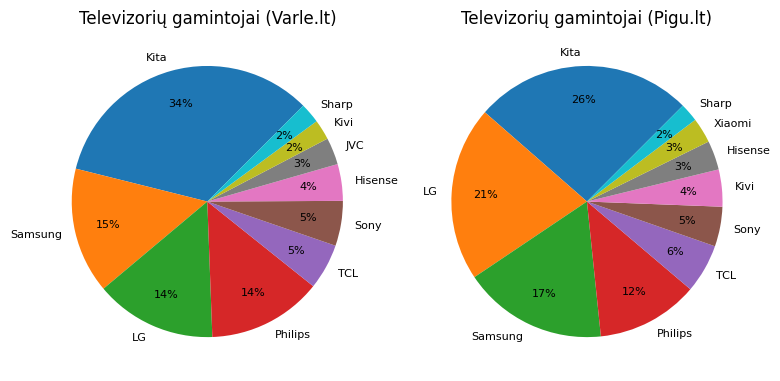

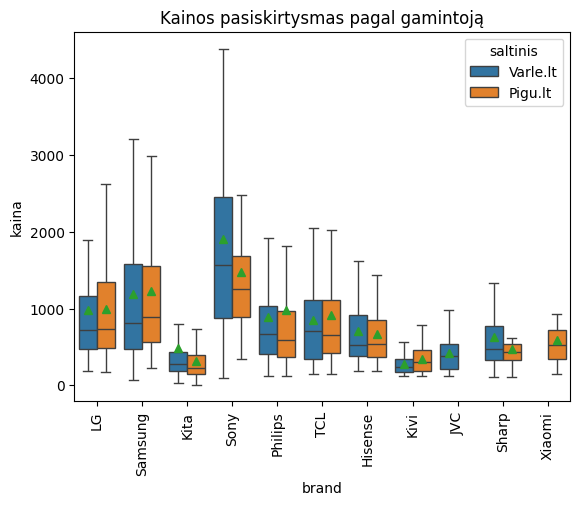

In [5]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()
dfp.head()


dfp['gamintojas'] = dfp['Prekės ženklas:']

top = df['gamintojas'].value_counts().head(9).index.tolist()

df['brand'] = df['gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()
df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

# pigu
top_p = dfp['gamintojas'].value_counts().head(9).index.tolist()

dfp['brand'] = dfp['gamintojas'].apply(lambda x: x if x in top_p else 'Kita')
c_p = dfp['brand'].value_counts()

df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

# sujungiam
df_join = df[['kaina', 'brand', 'saltinis']]
dfp_join = dfp[['kaina', 'brand', 'saltinis']]
df_combined = pd.concat([df_join, dfp_join])
# df_combined.dropna(subset='gamintojas', inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax1.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax1.set_title('Televizorių gamintojai (Varle.lt)')

ax2.pie(c_p.values, 
        labels=c_p.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax2.set_title('Televizorių gamintojai (Pigu.lt)')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=df_combined, x='brand', y='kaina',hue='saltinis', ax=ax, showmeans=True, showfliers=False)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Kainos pasiskirtysmas pagal gamintoją')
plt.show()

In [6]:
# tele size 
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano įstrižainė`
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Ekrano įstrižainė:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df.dropna(subset='ekrano įstrižainė', inplace=True)


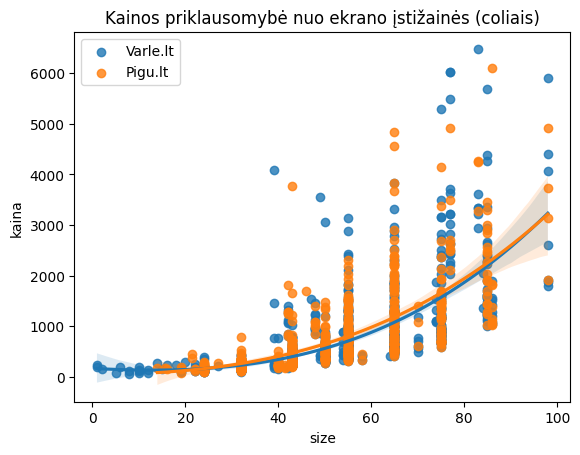

In [7]:
df['kaina'] = df['kaina'].apply(lambda x: float(x))

# Define a function to clean and extract the size in inches
def extract_inch_size(tv_size):
    # Remove any non-numeric characters except for the quotation marks (inches)
    tv_size = str(tv_size).lower().replace("coliu", "")  # Removing unwanted words like "coliu"
    
    # Match inches (e.g., "55", "43")
    inch_match = re.search(r'(\d+)\s*(?:"|inch)', tv_size)
    if inch_match:
        return int(inch_match.group(1))
    
    # Match size in cm and convert to inches (assuming 1 inch = 2.54 cm)
    cm_match = re.search(r'(\d+)\s*cm', tv_size)
    if cm_match:
        cm_value = int(cm_match.group(1))
        return round(cm_value / 2.54)
    
    if len(tv_size) <= 2:
        return int(tv_size)
    
    

df['size'] = df['ekrano įstrižainė'].apply(extract_inch_size)
df.dropna(subset='size', inplace=True)

def set_size_pigu(x):
    if x is not None:
        if '"' in x:
            return float(x.split('"')[0])
        if "''" in x:
            return float(x.split("''")[0])
        if '”'in x:
            return float(x.split('”')[0])
        

dfp['size'] = dfp['Ekrano įstrižainė:'].apply(set_size_pigu)

df_size = df[['kaina', 'size']]
df_size_gr = df_size.groupby('size').mean(numeric_only=True).reset_index()
dfp_size = dfp[['kaina', 'size']]
dfp_size_gr = dfp_size.groupby('size').mean(numeric_only=True).reset_index()


fig, ax = plt.subplots()
# sns.regplot(data=df_size_gr, x='size', y='kaina', ax=ax, label='Varle.lt',order=3)
sns.regplot(data=df_size, x='size', y='kaina', ax=ax, label='Varle.lt',order=3)
# sns.regplot(data=dfp_size_gr, x='size', y='kaina', ax=ax, label='Pigu.lt',order=3)
sns.regplot(data=dfp_size, x='size', y='kaina', ax=ax, label='Pigu.lt',order=3)
plt.title('Kainos priklausomybė nuo ekrano įstižainės (coliais)')
plt.legend()
plt.show()


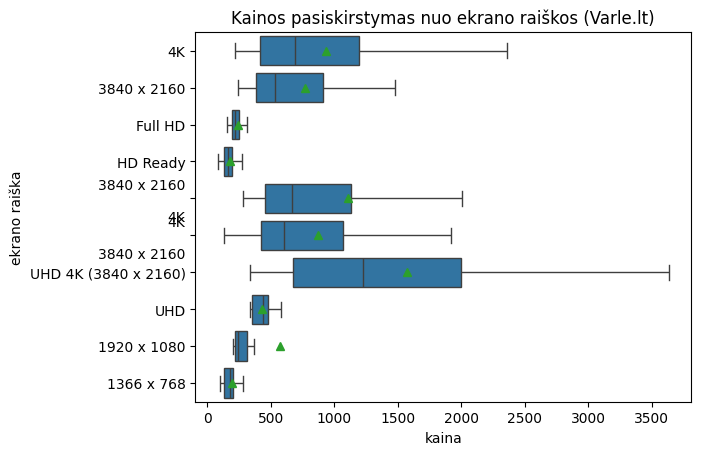

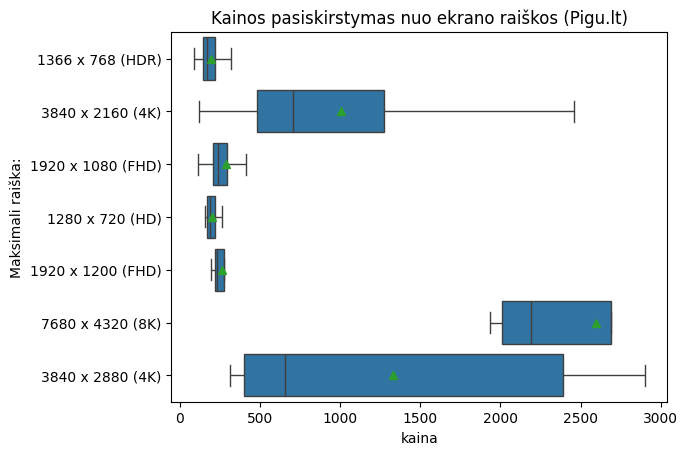

In [8]:
# tele max raiska 
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano raiška`
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Maksimali raiška:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
reso_counts = df['ekrano raiška'].value_counts()
reso_to_plot = reso_counts[reso_counts > 5].index

reso_counts_p = dfp['Maksimali raiška:'].value_counts()
reso_to_plot_p = reso_counts_p[reso_counts_p > 3].index

fig, ax = plt.subplots()
sns.boxplot(data=df[df['ekrano raiška'].isin(reso_to_plot)], y='ekrano raiška', x='kaina', showmeans=True, showfliers=False)
plt.title('Kainos pasiskirstymas nuo ekrano raiškos (Varle.lt)')
plt.show()

fig, ax = plt.subplots()
sns.boxplot(data=dfp[dfp['Maksimali raiška:'].isin(reso_to_plot_p)], y='Maksimali raiška:', x='kaina', showmeans=True, showfliers=False)
plt.title('Kainos pasiskirstymas nuo ekrano raiškos (Pigu.lt)')
plt.show()



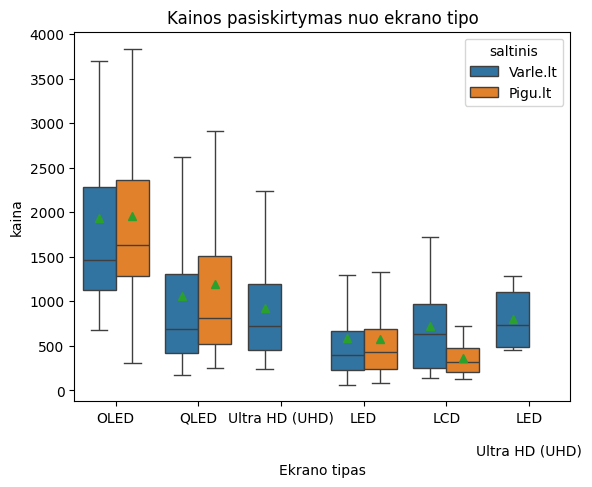

In [9]:
# tele ekrano tipas
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
Tipas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Ekrano tipas:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
df.drop_duplicates()
df.dropna(subset='tipas', inplace=True)
dfp.drop_duplicates()
dfp.dropna(subset='Ekrano tipas:', inplace=True)
df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'
df['Ekrano tipas'] = df['tipas']
dfp['Ekrano tipas'] = dfp['Ekrano tipas:']

df_join = df[['kaina', 'Ekrano tipas', 'saltinis']]
dfp_join = dfp[['kaina', 'Ekrano tipas', 'saltinis']]

df_combined = pd.concat([df_join, dfp_join])
tipas_counts = df['Ekrano tipas'].value_counts()
tipas_to_plot = tipas_counts[tipas_counts > 3].index

fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['Ekrano tipas'].isin(tipas_to_plot)], x='Ekrano tipas', y='kaina', hue='saltinis', showmeans=True, showfliers=False)
plt.title('Kainos pasiskirtymas nuo ekrano tipo')
plt.show()





In [10]:
c =dfp['Ekrano tipas:'].value_counts()
c

Ekrano tipas:
LED         364
QLED        106
OLED         54
LCD          28
NanoCell     22
QNED         21
IPS           2
VA            1
OLED+         1
Name: count, dtype: int64

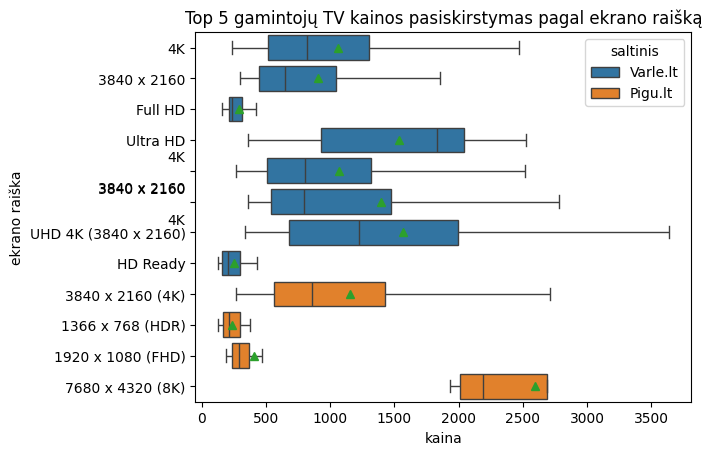

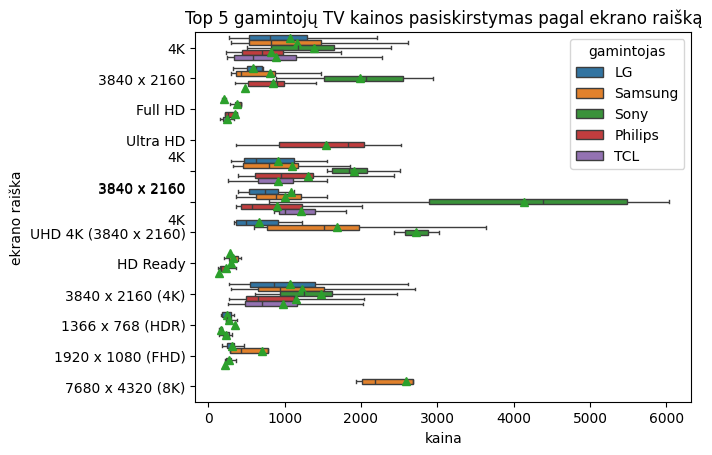

In [30]:
# top5 TV raiska
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano raiška`
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Maksimali raiška:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfp['gamintojas'] =dfp['Prekės ženklas:']
dfp['ekrano raiška'] = dfp['Maksimali raiška:']
df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'

top5TV = df['gamintojas'].value_counts().head(5).index.tolist()
top5TV_p = dfp['gamintojas'].value_counts().head(5).index.tolist()

df_join = df[df['gamintojas'].isin(top5TV)][['kaina', 'gamintojas', 'ekrano raiška', 'saltinis']]
dfp_join = dfp[dfp['gamintojas'].isin(top5TV_p)][['kaina', 'gamintojas', 'ekrano raiška', 'saltinis']]
df_combined = pd.concat([df_join, dfp_join]).reset_index()

types_counts = df_combined['ekrano raiška'].value_counts()
types_to_plot = types_counts[types_counts > 4].index

# fig, ax = plt.subplots(figsize= (12, 10))
fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['ekrano raiška'].isin(types_to_plot)], y='ekrano raiška', x='kaina',hue='saltinis',orient='h', showmeans=True, showfliers=False)
plt.title('Top 5 gamintojų TV kainos pasiskirstymas pagal ekrano raišką')
plt.show()

# fig, ax = plt.subplots(figsize= (12, 10))
fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['ekrano raiška'].isin(types_to_plot)], y='ekrano raiška', x='kaina',hue='gamintojas',orient='h', showmeans=True, showfliers=False)
plt.title('Top 5 gamintojų TV kainos pasiskirstymas pagal ekrano raišką')
plt.show()



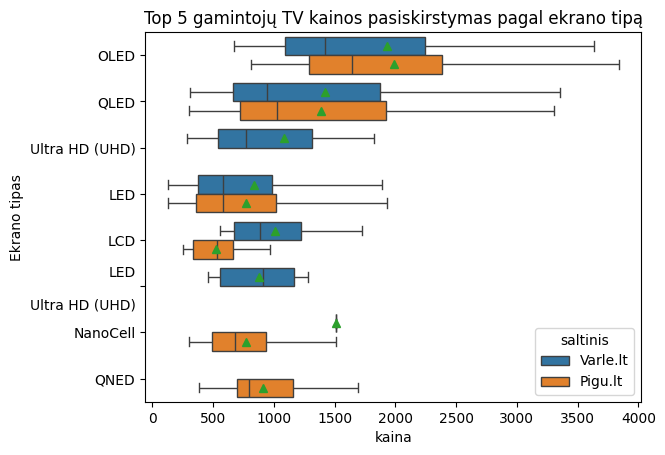

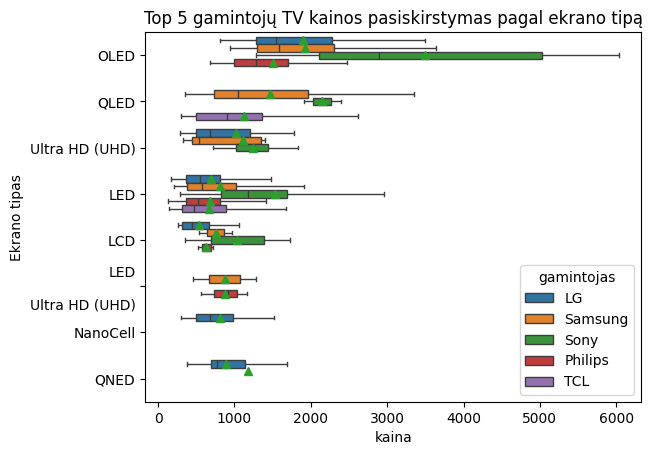

In [29]:
#  top 5tele ekrano tipas
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
Tipas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)

sql2="""select kaina,
`Prekės ženklas:`,
`Ekrano tipas:`
from TelePigu;"""
dfp = pd.read_sql_query(sql2, con=SDB)

SDB.close()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfp['gamintojas'] = dfp['Prekės ženklas:']
df.drop_duplicates()
df.dropna(subset='tipas', inplace=True)
dfp.drop_duplicates()
dfp.dropna(subset='Ekrano tipas:', inplace=True)
df['saltinis'] = 'Varle.lt'
dfp['saltinis'] = 'Pigu.lt'
df['Ekrano tipas'] = df['tipas']
dfp['Ekrano tipas'] = dfp['Ekrano tipas:']

df_join = df[df['gamintojas'].isin(top5TV)][['kaina', 'gamintojas', 'Ekrano tipas', 'saltinis']]
dfp_join = dfp[dfp['gamintojas'].isin(top5TV_p)][['kaina', 'gamintojas', 'Ekrano tipas', 'saltinis']]
df_combined = pd.concat([df_join, dfp_join]).reset_index()

types_counts = df_combined['Ekrano tipas'].value_counts()
types_to_plot = types_counts[types_counts > 4].index

# fig, ax = plt.subplots(figsize= (12, 10))
fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['Ekrano tipas'].isin(types_to_plot)], y='Ekrano tipas', x='kaina',hue='saltinis',orient='h', showmeans=True, showfliers=False)
plt.title('Top 5 gamintojų TV kainos pasiskirstymas pagal ekrano tipą')
plt.show()

# fig, ax = plt.subplots(figsize= (12, 10))
fig, ax = plt.subplots()
sns.boxplot(data=df_combined[df_combined['Ekrano tipas'].isin(types_to_plot)], y='Ekrano tipas', x='kaina',hue='gamintojas',orient='h', showmeans=True, showfliers=False)
plt.title('Top 5 gamintojų TV kainos pasiskirstymas pagal ekrano tipą')
plt.show()

In [12]:
# lentele varle
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
gamintojas,
`ekrano įstrižainė`,
`ekrano raiška`,
Tipas
from TeleVarle;"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

df['kaina'] = df['kaina'].str.extract('(\d+)')
df['kaina'] = df['kaina'].apply(lambda x: float(x))

# Define a function to clean and extract the size in inches
def extract_inch_size(tv_size):
    # Remove any non-numeric characters except for the quotation marks (inches)
    tv_size = str(tv_size).lower().replace("coliu", "")  # Removing unwanted words like "coliu"
    
    # Match inches (e.g., "55", "43")
    inch_match = re.search(r'(\d+)\s*(?:"|inch)', tv_size)
    if inch_match:
        return int(inch_match.group(1))
    
    # Match size in cm and convert to inches (assuming 1 inch = 2.54 cm)
    cm_match = re.search(r'(\d+)\s*cm', tv_size)
    if cm_match:
        cm_value = int(cm_match.group(1))
        return round(cm_value / 2.54)
    
    if len(tv_size) <= 2:
        return int(tv_size)
    
    

df['size'] = df['ekrano įstrižainė'].apply(extract_inch_size)


In [13]:
price_bins = [0, 100, 200, 500,30000]
price_labels = ['iki 100', '101-200', '201-500', 'nuo 500']
df_data = df[['kaina', 'gamintojas', 'ekrano įstrižainė', 'ekrano raiška', 'tipas']]

df_data['price_range'] = pd.cut(df_data['kaina'], bins=price_bins, labels=price_labels, right=True)

grouped = df_data.groupby('price_range')
def safe_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

# # find most comman
most_common_drone = grouped.agg({
    'kaina': safe_mode,
    'gamintojas': safe_mode,
    'ekrano įstrižainė': safe_mode,
    'ekrano raiška': safe_mode,
    'tipas': safe_mode
}).reset_index()

print(most_common_drone)

  price_range  kaina gamintojas ekrano įstrižainė ekrano raiška tipas
0     iki 100   66.0       Nvox                10      HD Ready   LED
1     101-200  159.0       Kivi                32      HD Ready   LED
2     201-500  359.0    Philips                43            4K   LED
3     nuo 500  559.0    Samsung                65            4K   LED


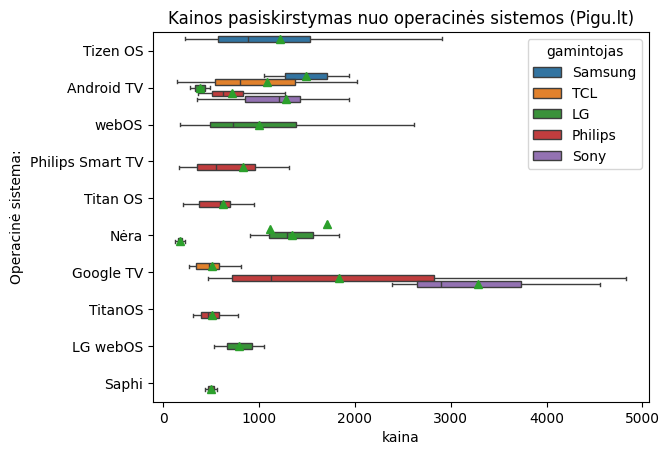

In [32]:
# operacine pigu
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`Prekės ženklas:`,
`Operacinė sistema:`

from TelePigu;"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

df['gamintojas'] = df['Prekės ženklas:']
top5 = df['gamintojas'].value_counts().head(5).index.tolist()

fig, ax = plt.subplots()
sns.boxplot(data=df[df['gamintojas'].isin(top5)], y='Operacinė sistema:', x='kaina', hue='gamintojas', showmeans=True, showfliers=False)
plt.title('Kainos pasiskirstymas nuo operacinės sistemos (Pigu.lt)')
plt.show()

In [15]:
# lentele pigu
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
`Prekės ženklas:`,
`Ekrano įstrižainė:`,
`Maksimali raiška:`,
`Ekrano tipas:`,
`Spalva:`,
`WiFi:`,
`Bluetooth:`,
`Operacinė sistema:`

from TelePigu;"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

def set_size_pigu(x):
    if x is not None:
        if '"' in x:
            return float(x.split('"')[0])
        if "''" in x:
            return float(x.split("''")[0])
        if '”'in x:
            return float(x.split('”')[0])
        

df['size'] = df['Ekrano įstrižainė:'].apply(set_size_pigu)


In [16]:
price_bins = [0, 100, 200, 500,30000]
price_labels = ['iki 100', '101-200', '201-500', 'nuo 500']
df_data = df[['kaina', 'Prekės ženklas:','size','Maksimali raiška:','Ekrano tipas:','Spalva:','WiFi:','Bluetooth:','Operacinė sistema:']]

df_data['price_range'] = pd.cut(df_data['kaina'], bins=price_bins, labels=price_labels, right=True)

grouped = df_data.groupby('price_range')
def safe_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

# # find most comman
most_common_drone = grouped.agg({
    'kaina': safe_mode,
    'Prekės ženklas:': safe_mode,
    'size': safe_mode,
    'Maksimali raiška:': safe_mode,
    'Ekrano tipas:': safe_mode,
    'Spalva:': safe_mode,
    'WiFi:': safe_mode,
    'Bluetooth:': safe_mode,
    'Operacinė sistema:': safe_mode,
}).reset_index()

print(most_common_drone)

  price_range   kaina Prekės ženklas:  size Maksimali raiška: Ekrano tipas:  \
0     iki 100   60.99            Hama  19.0  1366 x 768 (HDR)           LED   
1     101-200  131.00            Kivi  32.0  1366 x 768 (HDR)           LED   
2     201-500  239.00              LG  43.0  3840 x 2160 (4K)           LED   
3     nuo 500  699.00              LG  65.0  3840 x 2160 (4K)           LED   

  Spalva: WiFi: Bluetooth: Operacinė sistema:  
0    None   Yra       Nėra         Android TV  
1   Juoda   Yra       Nėra         Android TV  
2   Juoda   Yra        Yra         Android TV  
3   Juoda   Yra        Yra              webOS  
